In [0]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/SohelRaja/ML_repo_college/master/Decision%20Tree%20with%20Python/WA_Fn-UseC_-Telco-Customer-Churn.csv'
telco = pd.read_csv(url)
telco=telco.drop(['customerID','TotalCharges'] , axis=1)
telco.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,Yes
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,No
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,Yes
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,No


**DATA CLEANING AND DATA HANDLING**

In [4]:
telco['Partner'].replace(to_replace=[['No'],['Yes']],value=['PartnerNo','PartnerYes'],inplace=True)
telco['Dependents'].replace(to_replace=[['No'],['Yes']],value=['Independent','Dependent'],inplace=True)
telco['PhoneService'].replace(to_replace=[['No'],['Yes']],value=['PSNo','PSYes'],inplace=True)
telco['PaperlessBilling'].replace(to_replace=[['No'],['Yes']],value=['PLBNo','PLBYes'],inplace=True)
telco['MultipleLines'].replace(to_replace=[['No phone service'],['No'],['Yes']],value=['MLNo','MLNo','MLYes'],inplace=True)
telco['OnlineSecurity'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['OSNo','OSNo','OSYes'],inplace=True)
telco['OnlineBackup'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['OBNo','OBNo','OBYes'],inplace=True)
telco['DeviceProtection'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['DPNo','DPNo','DPYes'],inplace=True)
telco['TechSupport'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['TSNo','TSNo','TSYes'],inplace=True)
telco['StreamingTV'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['STVNo','STVNo','STVYes'],inplace=True)
telco['StreamingMovies'].replace(to_replace=[['No internet service'],['No'],['Yes']],value=['SMNo','SMNo','SMYes'],inplace=True)
telco.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,PartnerYes,Independent,1,PSNo,MLNo,DSL,OSNo,OBYes,DPNo,TSNo,STVNo,SMNo,Month-to-month,PLBYes,Electronic check,29.85,No
1,Male,0,PartnerNo,Independent,34,PSYes,MLNo,DSL,OSYes,OBNo,DPYes,TSNo,STVNo,SMNo,One year,PLBNo,Mailed check,56.95,No
2,Male,0,PartnerNo,Independent,2,PSYes,MLNo,DSL,OSYes,OBYes,DPNo,TSNo,STVNo,SMNo,Month-to-month,PLBYes,Mailed check,53.85,Yes
3,Male,0,PartnerNo,Independent,45,PSNo,MLNo,DSL,OSYes,OBNo,DPYes,TSYes,STVNo,SMNo,One year,PLBNo,Bank transfer (automatic),42.30,No
4,Female,0,PartnerNo,Independent,2,PSYes,MLNo,Fiber optic,OSNo,OBNo,DPNo,TSNo,STVNo,SMNo,Month-to-month,PLBYes,Electronic check,70.70,Yes
5,Female,0,PartnerNo,Independent,8,PSYes,MLYes,Fiber optic,OSNo,OBNo,DPYes,TSNo,STVYes,SMYes,Month-to-month,PLBYes,Electronic check,99.65,Yes
6,Male,0,PartnerNo,Dependent,22,PSYes,MLYes,Fiber optic,OSNo,OBYes,DPNo,TSNo,STVYes,SMNo,Month-to-month,PLBYes,Credit card (automatic),89.10,No
7,Female,0,PartnerNo,Independent,10,PSNo,MLNo,DSL,OSYes,OBNo,DPNo,TSNo,STVNo,SMNo,Month-to-month,PLBNo,Mailed check,29.75,No
8,Female,0,PartnerYes,Independent,28,PSYes,MLYes,Fiber optic,OSNo,OBNo,DPYes,TSYes,STVYes,SMYes,Month-to-month,PLBYes,Electronic check,104.80,Yes
9,Male,0,PartnerNo,Dependent,62,PSYes,MLNo,DSL,OSYes,OBYes,DPNo,TSNo,STVNo,SMNo,One year,PLBNo,Bank transfer (automatic),56.15,No


In [5]:
telco['gender'].replace(to_replace=[['Female'],['Male']],value=[0,1],inplace=True)
telco['Partner'].replace(to_replace=[['PartnerNo'],['PartnerYes']],value=[0,1],inplace=True)
telco['Dependents'].replace(to_replace=[['Independent'],['Dependent']],value=[0,1],inplace=True)
telco['PhoneService'].replace(to_replace=[['PSNo'],['PSYes']],value=[0,1],inplace=True)
telco['PaperlessBilling'].replace(to_replace=[['PLBNo'],['PLBYes']],value=[0,1],inplace=True)
telco['MultipleLines'].replace(to_replace=[['MLNo'],['MLYes']],value=[0,1],inplace=True)
telco['OnlineSecurity'].replace(to_replace=[['OSNo'],['OSYes']],value=[0,1],inplace=True)
telco['OnlineBackup'].replace(to_replace=[['OBNo'],['OBYes']],value=[0,1],inplace=True)
telco['DeviceProtection'].replace(to_replace=[['DPNo'],['DPYes']],value=[0,1],inplace=True)
telco['TechSupport'].replace(to_replace=[['TSNo'],['TSYes']],value=[0,1],inplace=True)
telco['StreamingTV'].replace(to_replace=[['STVNo'],['STVYes']],value=[0,1],inplace=True)
telco['StreamingMovies'].replace(to_replace=[['SMNo'],['SMYes']],value=[0,1],inplace=True)
telco['InternetService'].replace(to_replace=[['DSL'],['Fiber optic'],['No']],value=[0,1,2],inplace=True)
telco['PaymentMethod'].replace(to_replace=[['Electronic check'],['Mailed check'],['Bank transfer (automatic)'],['Credit card (automatic)']],value=[0,1,2,3],inplace=True)
telco['Contract'].replace(to_replace=[['Month-to-month'], ['One year'], ['Two year']],value=[0,1,2],inplace=True)
telco['Churn'].replace(to_replace=[['No'], ['Yes']],value=[0,1],inplace=True)
telco.head(20)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,29.85,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,1,56.95,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,1,53.85,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,2,42.30,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,0,70.70,1
5,0,0,0,0,8,1,1,1,0,0,1,0,1,1,0,1,0,99.65,1
6,1,0,0,1,22,1,1,1,0,1,0,0,1,0,0,1,3,89.10,0
7,0,0,0,0,10,0,0,0,1,0,0,0,0,0,0,0,1,29.75,0
8,0,0,1,0,28,1,1,1,0,0,1,1,1,1,0,1,0,104.80,1
9,1,0,0,1,62,1,0,0,1,1,0,0,0,0,1,0,2,56.15,0


In [6]:
telco.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.872923,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.690473,0.592219,1.315633,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.737796,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.833755,0.491457,1.148907,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,118.750000,1.000000


**Data Visualization**

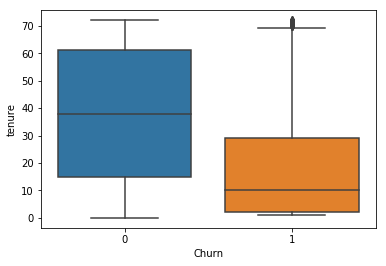

In [7]:
sns.boxplot(x='Churn',y='tenure',data=telco)


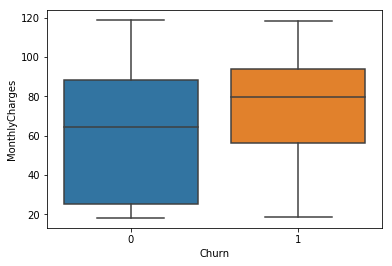

In [8]:
sns.boxplot(x='Churn',y='MonthlyCharges',data=telco)

**KNN Classification**

In [0]:
import itertools
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

**Train Test Split**

In [10]:
X=telco[['gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges']]
X1=telco[['tenure','InternetService','PhoneService']]
y=telco['Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=2)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.1,random_state=2)

Train set: (6338, 18) (6338,)
Test set: (705, 18) (705,)


**Unscaled KNN:**

In [11]:

K=100
acc=np.zeros((K-1))
for k in range(1,K):
  model=KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
  y_pred=model.predict(X_test)
  acc[k-1]=metrics.accuracy_score(y_test,y_pred)
#print (acc)
print("The Best Accuracy is:",acc.max()*100,"% with k=",acc.argmax()+1)

The Best Accuracy is: 81.84397163120568 % with k= 84


In [12]:
K=100
acc=np.zeros((K-1))
for k in range(1,K):
  model=KNeighborsClassifier(n_neighbors=k).fit(X1_train,y_train)
  y_pred=model.predict(X1_test)
  acc[k-1]=metrics.accuracy_score(y_test,y_pred)
#print (acc)
print("The Best Accuracy is:",acc.max()*100,"% with k=",acc.argmax()+1)

The Best Accuracy is: 82.41134751773049 % with k= 38


**KNN Using GridSearchCV and Scaling**

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
steps=[('scaler',StandardScaler()),('knn',KNeighborsClassifier())]
pipeline=Pipeline(steps)
param_grid={'knn__n_neighbors':np.arange(1,100)}
knn_cv=GridSearchCV(pipeline,param_grid,cv=10)
knn_cv.fit(X_train,y_train)
y_preds=knn_cv.predict(X_test)
print("Accuracy on test data:",knn_cv.score(X_test,y_test)*100)
print("The Best Accuracy is:",knn_cv.best_score_*100,"% with k=",knn_cv.best_params_)

Accuracy on test data: 80.1418439716312
The Best Accuracy is: 78.54212685389713 % with k= {'knn__n_neighbors': 80}
